## Term centric protein nums

In [2]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib_venn import venn2
from collections import Counter
from collections import defaultdict

processed_go_dir = "../../data/processed/gograph/"
processed_quickgo_dir = "../../data/processed/quickgo/"

### Plot Venn (BP, MF, CC; Train-Test proteins and terms), 

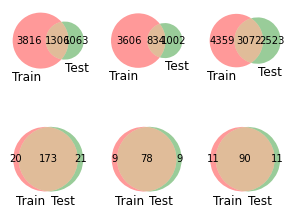

In [10]:
"""Read proteins and terms of constructed dataset"""
def read_pro_term(_dir):
    train_pros = set([l.strip() for l in open(os.path.join(_dir, "train_pro.tsv"), "r").readlines()])
    test_pros = set([l.strip() for l in open(os.path.join(_dir, "test_pro.tsv"), "r").readlines()])
    train_terms = set([l.strip() for l in open(os.path.join(_dir, "train_term.tsv"), "r").readlines()])
    test_terms = set([l.strip() for l in open(os.path.join(_dir, "test_term.tsv"), "r").readlines()])
    return train_pros, train_terms, test_pros, test_terms

bp_train_pros, bp_train_terms, bp_test_pros, bp_test_terms = read_pro_term(os.path.join(processed_quickgo_dir, "bp"))
mf_train_pros, mf_train_terms, mf_test_pros, mf_test_terms = read_pro_term(os.path.join(processed_quickgo_dir, "mf"))
cc_train_pros, cc_train_terms, cc_test_pros, cc_test_terms = read_pro_term(os.path.join(processed_quickgo_dir, "cc"))


def plot_venn(train_pros, train_terms, test_pros, test_terms, sub0, sub1):
    co_pn = len(train_pros & test_pros)
    co_tn = len(train_terms & test_terms)

    tr_pn, tr_tn = len(train_pros)-co_pn, len(train_terms)-co_tn
    te_pn, te_tn = len(test_pros)-co_pn, len(test_terms)-co_tn

    
    venn2(subsets=(tr_pn, te_pn, co_pn), set_labels=["Train", "Test"], ax=sub0)
    venn2(subsets=(tr_tn, te_tn, co_tn), set_labels=["Train", "Test"], ax=sub1)

fig, subs = plt.subplots(2, 3, figsize=(5, 4))

plot_venn(bp_train_pros, bp_train_terms, bp_test_pros, bp_test_terms, sub0=subs[0, 0], sub1=subs[1, 0])
plot_venn(mf_train_pros, mf_train_terms, mf_test_pros, mf_test_terms, sub0=subs[0, 1], sub1=subs[1, 1])
plot_venn(cc_train_pros, cc_train_terms, cc_test_pros, cc_test_terms, sub0=subs[0, 2], sub1=subs[1, 2])
plt.savefig("./figures/venn_pro_term.pdf")



### Plot Four type samples

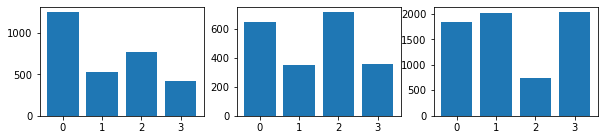

In [25]:
def plot_test_samples(_dir, sub):
    test_samples = [l.strip().split() for l in open(os.path.join(_dir, "test.tsv"), "r").readlines()[1:]]
    test_counter = Counter([int(_c) for _, _, _c in test_samples])

    sub.bar(np.arange(4), [test_counter[0], test_counter[1], test_counter[2], test_counter[3]])

fig, subs = plt.subplots(1, 3, figsize=(10, 2))
plot_test_samples(os.path.join(processed_quickgo_dir, "bp"), subs[0])
plot_test_samples(os.path.join(processed_quickgo_dir, "mf"), subs[1])
plot_test_samples(os.path.join(processed_quickgo_dir, "cc"), subs[2])
plt.savefig("./figures/bar_test.pdf")

    

### Plot Term Depth

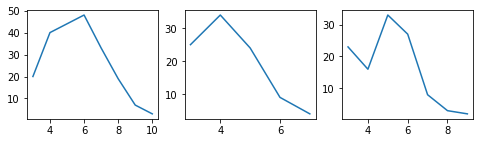

In [16]:
def plot_term_depth(go_dir, data_dir, sub):
    go_term_dep = {l.strip().split()[0]: int(l.strip().split()[2]) for l in open(os.path.join(go_dir, "term_depth.tsv"), "r").readlines()[1:]}
    train_terms = set([l.strip() for l in open(os.path.join(data_dir, 'train_term.tsv'), "r").readlines()])
    test_terms = set([l.strip() for l in open(os.path.join(data_dir, 'test_term.tsv'), "r").readlines()])
    term_deps_counter = Counter([go_term_dep[t] for t in train_terms | test_terms])

    data = [(k, v) for k, v in term_deps_counter.items()]
    data = sorted(data, key=lambda x: x[0])
    ds, vs = zip(*data)
    sub.plot(ds, vs)

fig, subs = plt.subplots(1, 3, figsize=(8, 2))
plot_term_depth(os.path.join(processed_go_dir, "bp"), os.path.join(processed_quickgo_dir, "bp"), subs[0])
plot_term_depth(os.path.join(processed_go_dir, "mf"), os.path.join(processed_quickgo_dir, "mf"), subs[1])
plot_term_depth(os.path.join(processed_go_dir, "cc"), os.path.join(processed_quickgo_dir, "cc"), subs[2])
plt.savefig("./figures/line_term_depth.pdf")

